In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.cluster import KMeans
np.warnings.filterwarnings('ignore')

In [2]:
game = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/vgsales.csv")
display(game)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:>

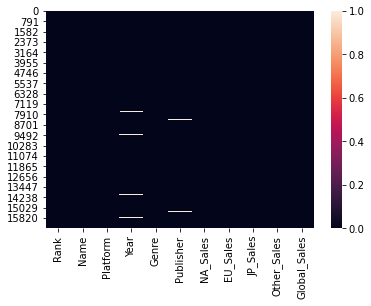

In [3]:
sns.heatmap(game.isnull())

In [4]:
display(game[game['Year'].isnull()].head(10))
display(game[game['Year'].isnull()].shape)
display(game[game['Publisher'].isnull()].head(10))
display(game[game['Publisher'].isnull()].shape)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


(271, 11)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.0,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.0,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.0,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.0,0.01,0.42


(58, 11)

In [5]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
game.select_dtypes('object').columns

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [8]:
fig = px.histogram(game, x="Platform", template="plotly_white", color_discrete_sequence=["rgb(127,232,186)"]).update_xaxes(categoryorder="total descending")
fig.show()

print("Platform has {} unique values".format(len(game['Platform'].unique())))
print("Top 5 values are: {}".format(', '.join(game['Platform'].value_counts().index[:5])))

Platform has 31 unique values
Top 5 values are: DS, PS2, PS3, Wii, X360


In [9]:
fig = px.histogram(game, x="Genre", template="plotly_white", color_discrete_sequence=["rgb(127,232,186)"]).update_xaxes(categoryorder="total descending")
fig.show()

print("Genre has {} unique values".format(len(game['Genre'].unique())))
print("Top 5 values are: {}".format(', '.join(game['Genre'].value_counts().index[:5])))

Genre has 12 unique values
Top 5 values are: Action, Sports, Misc, Role-Playing, Shooter


In [10]:
fig = px.histogram(game, x="Publisher", template="plotly_white", color_discrete_sequence=["rgb(127,232,186)"]).update_xaxes(categoryorder="total descending")
fig.show()

print("Publisher has {} unique values".format(len(game['Publisher'].unique())))
print("Top 10 values are: {}".format(', '.join(game['Publisher'].value_counts().index[:10])))

Publisher has 579 unique values
Top 10 values are: Electronic Arts, Activision, Namco Bandai Games, Ubisoft, Konami Digital Entertainment, THQ, Nintendo, Sony Computer Entertainment, Sega, Take-Two Interactive


In [11]:
numbers = list(game.select_dtypes(['int64', 'float64']).columns)[2:]
numbers

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [12]:
fig = make_subplots(rows=6, cols=2)

fig.add_trace(go.Histogram(x=game['NA_Sales'], nbinsx=10, name='NA_Sales', marker_color='rgb(254, 147, 140)', opacity=0.8), row=1, col=1)
fig.add_trace(go.Box(x=game['NA_Sales'], name='NA_Sales', marker_color='rgb(254, 147, 140)'), row=2, col=1)

fig.add_trace(go.Histogram(x=game['EU_Sales'], nbinsx=10, name='EU_Sales', marker_color='rgb(230, 184, 156)', opacity=0.8), row=1, col=2)
fig.add_trace(go.Box(x=game['EU_Sales'], name='EU_Sales', marker_color='rgb(230, 184, 156)'), row=2, col=2)

fig.add_trace(go.Histogram(x=game['JP_Sales'], nbinsx=10, name='JP_Sales', marker_color='rgb(234, 210, 172)', opacity=0.8), row=3, col=1)
fig.add_trace(go.Box(x=game['JP_Sales'], name='JP_Sales', marker_color='rgb(234, 210, 172)'), row=4, col=1)

fig.add_trace(go.Histogram(x=game['Other_Sales'], nbinsx=10, name='Other_Sales', marker_color='rgb(156, 175, 183)', opacity=0.8), row=3, col=2)
fig.add_trace(go.Box(x=game['Other_Sales'], name='Other_Sales', marker_color='rgb(156, 175, 183)'), row=4, col=2)

fig.add_trace(go.Histogram(x=game['Global_Sales'], nbinsx=10, name='Global_Sales', marker_color='rgb(66, 129, 164)', opacity=0.8), row=5, col=1)
fig.add_trace(go.Box(x=game['Global_Sales'], name='Global_Sales', marker_color='rgb(66, 129, 164)'), row=6, col=1)

fig.update_layout(template="plotly_white",
    autosize=False,
    width=1200,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100))

fig.show()

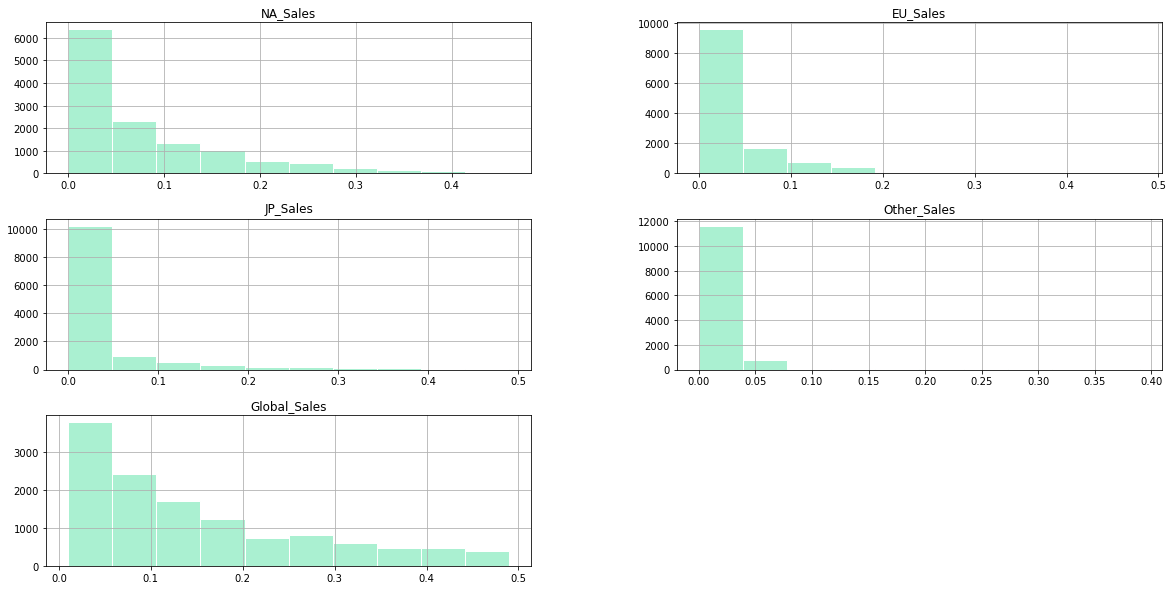

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
woutliers = game[game['Global_Sales']<0.5]
woutliers[numbers].hist(figsize=(20,10), color='#aaf0d1', edgecolor='white')

plt.show()

game[numbers].describe()

In [14]:
fig = px.histogram(game, x="Year", template="plotly_white", color_discrete_sequence=["rgb(127,232,186)"]).update_xaxes(categoryorder="total descending")
fig.show()

game['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [15]:
sales = game.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)


d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['Global_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'Global_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['Global_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
    data_frame=finalx,
    y='Global_Sales',
    x='Platform',
    animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()

In [16]:
best =  pd.DataFrame(game.groupby('Platform')['Global_Sales'].sum())
best = best.reset_index()

fig = px.bar(
  data_frame=best,
  y='Global_Sales',
  x='Platform',
    template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()

In [17]:
sales = game.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
genre = list(sales['Genre'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)


d = {}
g = []
y = []


for i in genre:
    for j in year:
        g.append(i)
        y.append(j)

d['Genre'] = g
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['Global_Sales'] = 0


sales = sales.loc[:,['Genre', 'Year', 'Global_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Genre', 'Year'])['Global_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
  data_frame=finalx,
  y='Global_Sales',
  x='Genre',
  animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(66, 129, 164)']).update_xaxes(categoryorder="total descending")

fig.show()

In [18]:
best =  pd.DataFrame(game.groupby('Genre')['Global_Sales'].sum())
best = best.reset_index()

fig = px.bar(
  data_frame=best,
  y='Global_Sales',
  x='Genre',
    template="plotly_white", color_discrete_sequence=['rgb(66, 129, 164)']).update_xaxes(categoryorder="total descending")

fig.show()

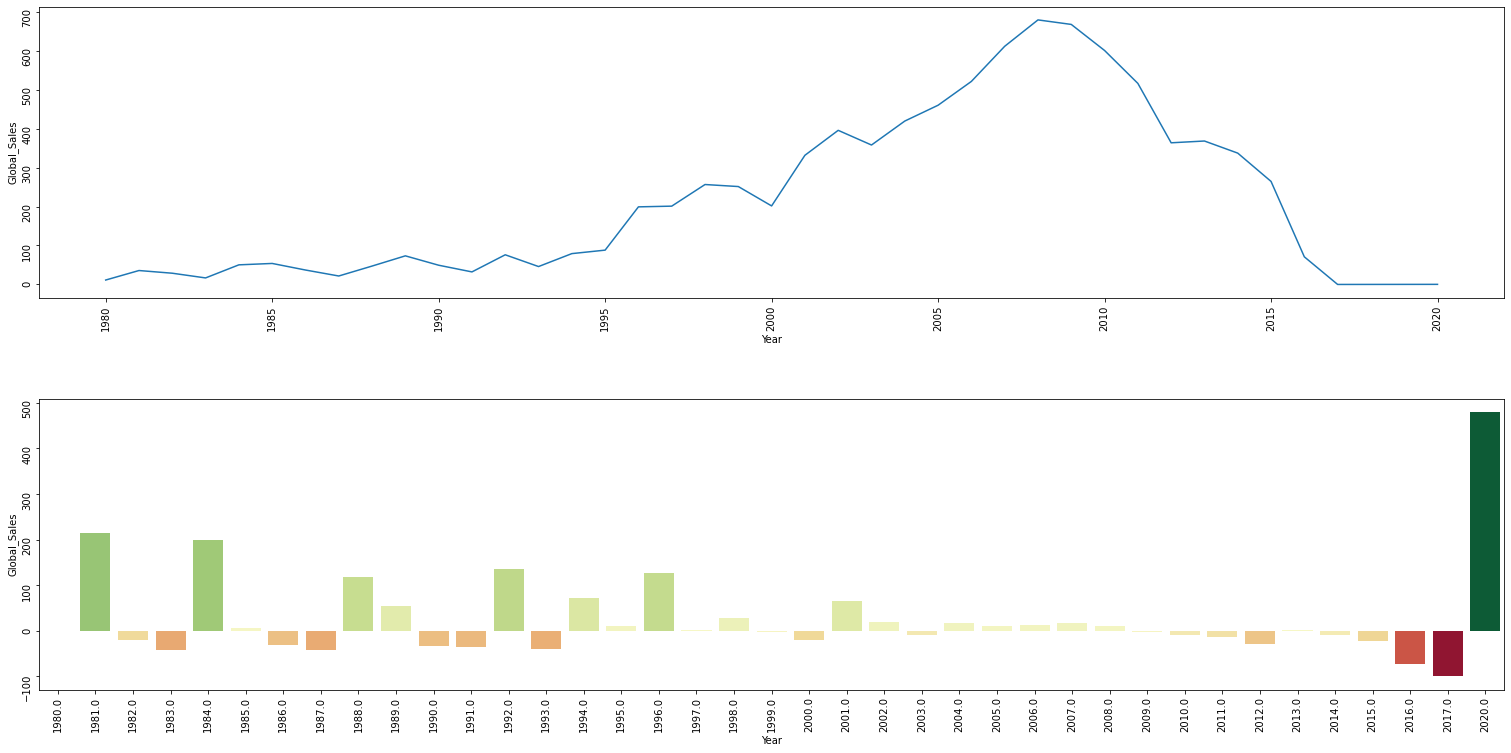

Year,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Global_Sales,251.27,201.56,331.47,395.52,357.85,419.31,459.94,521.04,611.13,678.9,667.3,600.45,515.99,363.54,368.11,337.05,264.44,70.93,0.05,0.29


In [19]:
fig, ax = plt.subplots(2, 1, figsize=(23,12))
fig.tight_layout(pad=8)

line = game.groupby(['Year'])['Global_Sales'].sum()
line = pd.DataFrame(line)

group = game.groupby(['Year'])['Global_Sales'].sum()
group = pd.DataFrame(group)
group['Global_Sales'] = np.round(group['Global_Sales'].pct_change() * 100, 2)

norm = DivergingNorm(vmin=group['Global_Sales'].min(), vcenter=0, vmax=group['Global_Sales'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in group['Global_Sales']]

sns.lineplot(x=line.index, y=line['Global_Sales'], data=line, ax=ax[0])
ax[0].tick_params(labelrotation=90)

sns.barplot(x=group.index, y=group['Global_Sales'], data=group, palette=colors, ax=ax[1])
ax[1].tick_params(labelrotation=90)

plt.show()

display(line.iloc[19:,:].T)

In [20]:
X = game.loc[:,'NA_Sales':].values

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

game['Cluster'] = kmeans.labels_
game['Cluster'] = game['Cluster'].astype(str)

fig = px.scatter(data_frame=game,
    x='EU_Sales',
    y='Global_Sales',
    color='Cluster',
    template="plotly_white",
    color_discrete_map={'0':"rgb(219, 58, 52)", '2':"rgb(255, 200, 87)", '1':"rgb(8, 76, 97)"},
     hover_name='Name',
    hover_data=['Platform', 'Publisher', 'Year'])
fig.show()

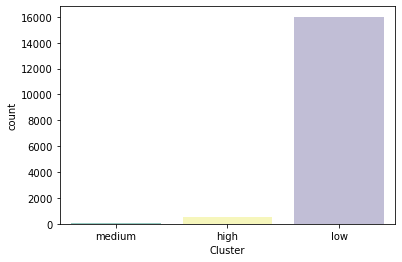

In [21]:
def cat(cluster):
    if cluster == '0':
        return 'low'
    if cluster == '1':
        return 'high'
    if cluster == '2':
        return 'medium'

game['Cluster'] = game['Cluster'].apply(cat)
sns.countplot(game['Cluster'], palette='Set3')
plt.show()

In [22]:
low = game[game['Cluster']=='low']


print("5 most frequent Platform in the low category are: {}".format(', '.join(low['Platform'].value_counts().index[:5])))
print("5 most frequent Genre in the low category are: {}".format(', '.join(low['Genre'].value_counts().index[:5])))
print("5 most frequent Publisher in the low category are: {}".format(', '.join(low['Publisher'].value_counts().index[:5])))
display(low.describe())

5 most frequent Platform in the low category are: DS, PS2, Wii, PS3, PSP
5 most frequent Genre in the low category are: Action, Sports, Misc, Role-Playing, Adventure
5 most frequent Publisher in the low category are: Electronic Arts, Namco Bandai Games, Activision, Ubisoft, Konami Digital Entertainment


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16011.000000,15746.000000,16011.000000,16011.000000,16011.000000,16011.000000,16011.000000
mean,8594.080570,2006.456941,0.171111,0.088128,0.054699,0.029845,0.344073
std,4622.462914,5.767240,0.266541,0.166979,0.165021,0.068297,0.458763
min,447.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4591.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8594.000000,2007.000000,0.070000,0.020000,0.000000,0.010000,0.160000
75%,12596.500000,2010.000000,0.210000,0.090000,0.030000,0.030000,0.420000
max,16600.000000,2020.000000,2.280000,2.000000,3.030000,2.050000,3.120000


In [23]:
medium = game[game['Cluster']=='medium']


print("5 most frequent Platform in the medium category are: {}".format(', '.join(medium['Platform'].value_counts().index[:5])))
print("5 most frequent Genre in the medium category are: {}".format(', '.join(medium['Genre'].value_counts().index[:5])))
print("5 most frequent Publisher in the medium category are: {}".format(', '.join(medium['Publisher'].value_counts().index[:5])))

display(medium.describe())

5 most frequent Platform in the medium category are: Wii, DS, GB, NES, PS2
5 most frequent Genre in the medium category are: Platform, Action, Sports, Role-Playing, Misc
5 most frequent Publisher in the medium category are: Nintendo, Take-Two Interactive, Microsoft Game Studios


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,13.000000,2001.720000,13.730000,7.368800,3.59200,2.370800,27.062400
std,7.359801,8.997778,8.332446,5.597028,2.50267,2.394768,13.198724
min,1.000000,1984.000000,4.750000,0.400000,0.06000,0.420000,16.150000
25%,7.000000,1996.000000,9.070000,3.750000,1.93000,0.770000,20.610000
50%,13.000000,2005.000000,10.830000,7.060000,3.77000,1.790000,23.100000
75%,19.000000,2008.000000,14.970000,9.230000,4.22000,2.850000,30.010000
max,25.000000,2013.000000,41.490000,29.020000,10.22000,10.570000,82.740000


In [24]:
high = game[game['Cluster']=='high']


print("5 most frequent Platform in the high category are: {}".format(', '.join(high['Platform'].value_counts().index[:5])))
print("5 most frequent Genre in the high category are: {}".format(', '.join(high['Genre'].value_counts().index[:5])))
print("5 most frequent Publisher in the high category are: {}".format(', '.join(high['Publisher'].value_counts().index[:5])))

display(high.describe())

5 most frequent Platform in the high category are: PS2, X360, PS3, PS, DS
5 most frequent Genre in the high category are: Action, Shooter, Sports, Role-Playing, Platform
5 most frequent Publisher in the high category are: Nintendo, Electronic Arts, Sony Computer Entertainment, Activision, Ubisoft


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,562.000000,556.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,308.357651,2005.187050,2.331032,1.492705,0.579075,0.463754,4.866406
std,165.391154,7.058896,1.458461,1.087293,0.983712,0.500731,2.624131
min,26.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,2.400000
25%,166.250000,2001.000000,1.450000,0.800000,0.020000,0.190000,3.120000
50%,306.500000,2007.000000,2.005000,1.240000,0.100000,0.345000,3.905000
75%,447.500000,2010.250000,2.800000,1.940000,0.767500,0.607500,5.445000
max,649.000000,2016.000000,9.670000,6.420000,5.650000,7.530000,15.850000


In [25]:
best = game.sort_values(by=['Global_Sales'], ascending=False)['Name'][0]
print("Best selling game ever is: {}".format(best))

Best selling game ever is: Wii Sports
